In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/nutrient_data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/nutrient_data.csv'

In [51]:
df.describe()

,POINT ID,PH,NA,NO3 and NO2,PO4,NH4,SO4,NH4.1
count,2230.0,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,90240.0,8.375411,42.640483,-886.625948,-4.338953,-17.631453,0.524924,-17.918541
std,0.0,0.461190,7.226160,2845.114159,211.743748,423.209873,0.077963,423.196840
min,90240.0,6.405000,1.000000,-9999.000000,-9999.000000,-9999.000000,0.073400,-9999.000000
25%,90240.0,8.110000,38.000000,0.363250,0.038000,0.025000,0.481500,0.001400
50%,90240.0,8.281000,42.698000,1.155500,0.080000,0.106000,0.516800,0.005900
75%,90240.0,8.600750,47.321000,1.744000,0.223000,0.282750,0.560475,0.015700
max,90240.0,10.030000,69.000000,6.137000,3.401000,20.118000,2.341300,1.117700


In [52]:
# Stel, dit zijn je kolomnamen
kolommen_numeriek = ['PH', 'NA', 'NO3 and NO2', 'PO4', 'NH4', 'SO4', 'NH4.1']

# Negatieve waarden vervangen door NaN in de 7 numerieke kolommen
df[kolommen_numeriek] = df[kolommen_numeriek].mask(df[kolommen_numeriek] < 0)


In [53]:
df.head()

,STATION,POINT ID,DATE,PH,NA,NO3 and NO2,PO4,NH4,SO4,NH4.1
0,A2R001Q01,90240,12/01/1999,8.60,36.2,1.424,0.038,0.02,0.6223,0.0011
1,A2R001Q01,90240,12/01/1999,8.63,36.8,1.273,0.041,0.02,0.6316,0.0011
2,A2R001Q01,90240,12/01/1999,8.73,36.8,1.276,0.014,0.02,0.6327,0.0011
3,A2R001Q01,90240,12/01/1999,8.87,37.6,1.438,0.041,0.02,0.6108,0.0011
4,A2R001Q01,90240,12/01/1999,8.57,36.5,1.484,0.035,0.02,0.6139,0.0011


In [54]:
df.describe()

,POINT ID,PH,NA,NO3 and NO2,PO4,NH4,SO4,NH4.1
count,2230.0,2230.000000,2230.000000,2032.000000,2229.000000,2226.000000,2230.000000,2226.000000
mean,90240.0,8.375411,42.640483,1.292389,0.144969,0.304519,0.524924,0.016916
std,0.0,0.461190,7.226160,0.849772,0.183248,0.855748,0.077963,0.047542
min,90240.0,6.405000,1.000000,0.005000,0.003000,0.015000,0.073400,0.000800
25%,90240.0,8.110000,38.000000,0.627500,0.038000,0.025000,0.481500,0.001400
50%,90240.0,8.281000,42.698000,1.251000,0.080000,0.107000,0.516800,0.005900
75%,90240.0,8.600750,47.321000,1.825250,0.223000,0.283000,0.560475,0.015700
max,90240.0,10.030000,69.000000,6.137000,3.401000,20.118000,2.341300,1.117700


In [57]:
# Define max potential growth rate (example value)
G_max = 0.043  # day^-1

# Updated RGR function based on optimal ranges
def compute_rgr_updated(row):
    f_pH = np.exp(-((row['PH'] - 6.65) / 0.85) ** 2)
    f_NH4 = np.exp(-((row['NH4'] - 80) / 70) ** 2)
    f_NO3 = np.exp(-((row['NO3 and NO2'] - 10.5) / 9.5) ** 2)
    f_N = f_NH4 * f_NO3
    f_P = np.exp(-((row['PO4'] - 1.75) / 1.25) ** 2)
    f_Na = np.exp(-((row['NA'] - 25) / 25) ** 2)
    f_SO4 = np.exp(-((row['SO4'] - 50) / 50) ** 2)
    
    return G_max * f_pH * f_N * f_P * f_Na * f_SO4

# Apply the updated function
df['RGR'] = df.apply(compute_rgr_updated, axis=1)

# Optional: scale to [0, 1] for easier visualization
df['RGR_scaled'] = (df['RGR'] - df['RGR'].min()) / (df['RGR'].max() - df['RGR'].min())

# Display results
df[['DATE', 'PH', 'NA', 'NO3 and NO2', 'PO4', 'NH4', 'SO4', 'RGR', 'RGR_scaled']].head()

,DATE,PH,NA,NO3 and NO2,PO4,NH4,SO4,RGR,RGR_scaled
0,12/01/1999,8.60,36.2,1.424,0.038,0.02,0.6223,1.145694e-06,0.003237
1,12/01/1999,8.63,36.8,1.273,0.041,0.02,0.6316,9.296559e-07,0.002626
2,12/01/1999,8.73,36.8,1.276,0.014,0.02,0.6327,4.996980e-07,0.001412
3,12/01/1999,8.87,37.6,1.438,0.041,0.02,0.6108,2.306824e-07,0.000652
4,12/01/1999,8.57,36.5,1.484,0.035,0.02,0.6139,1.337661e-06,0.003779


In [58]:
df['STATION'].unique()

array(['A2R001Q01'], dtype=object)

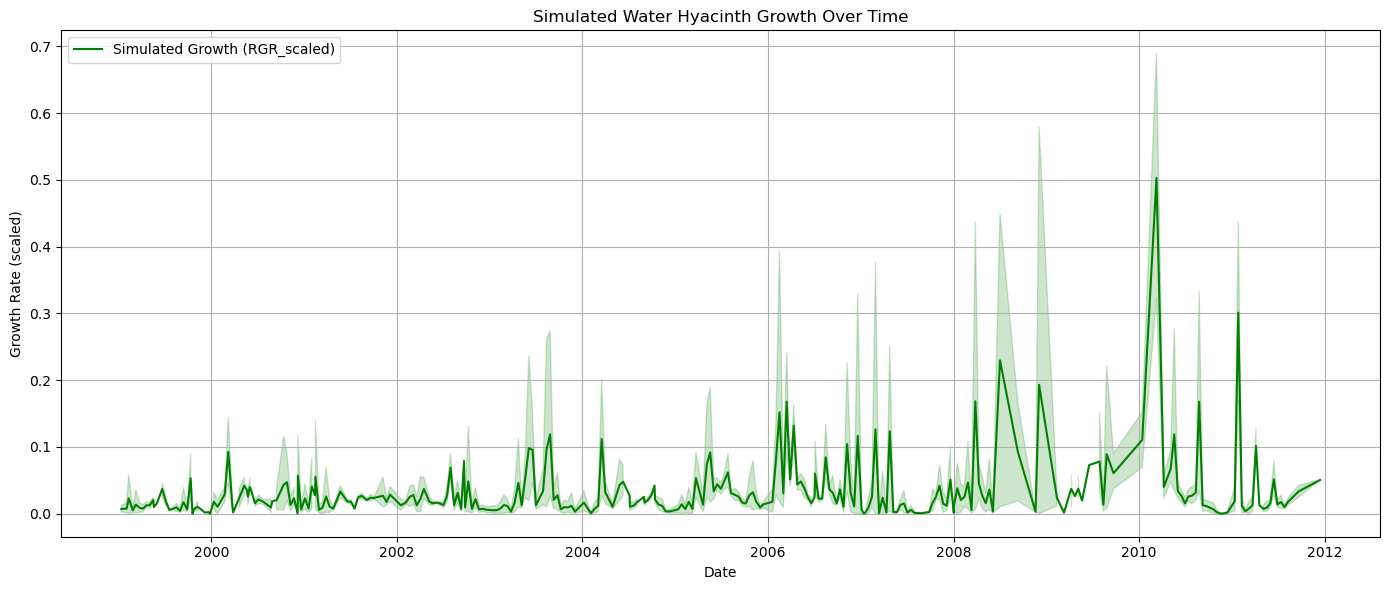

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'DATE' is in datetime format
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)

# Sort by date just to be safe
df = df.sort_values('DATE')

# Plot the scaled RGR over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='DATE', y='RGR_scaled', data=df, label='Simulated Growth (RGR_scaled)', color='green')
plt.title('Simulated Water Hyacinth Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Growth Rate (scaled)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
df = df.dropna()

In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# Kenmerkenkolommen
features = ['PH', 'NA', 'NO3 and NO2', 'PO4', 'NH4', 'SO4']
target = 'RGR_scaled'  # of 'RGR'

X = df[features]
y = df[target]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [72]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.0009
R² Score: 0.8850


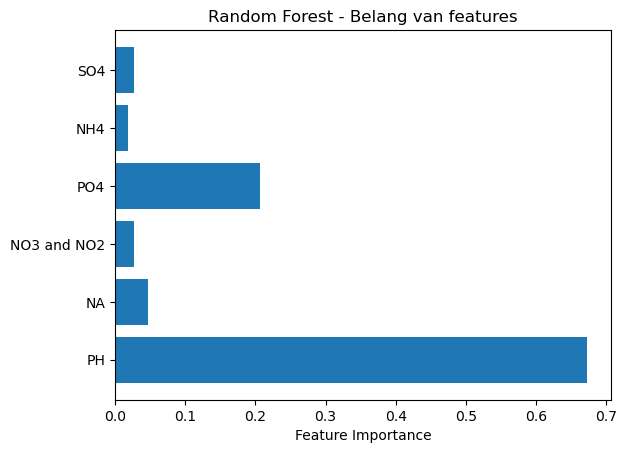

In [73]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Belang van features")
plt.show()


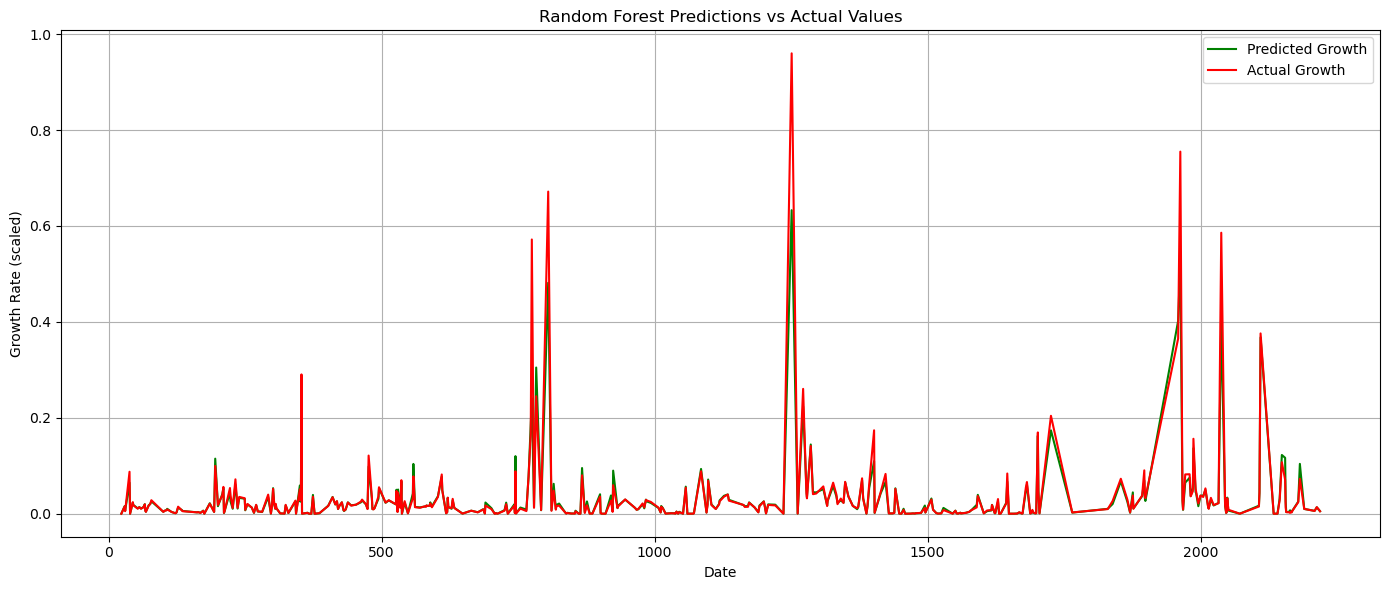

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

rf_df = pd.DataFrame({'Random Forest Predictions': y_pred, 'Actual Values': y_test, 'Date' : y_test.index}).set_index('Date')

rf_df = rf_df.sort_index()
plt.figure(figsize=(14, 6))
plt.plot(rf_df.index, rf_df['Random Forest Predictions'], label='Predicted Growth', color='green')
plt.plot(rf_df.index, rf_df['Actual Values'], label='Actual Growth', color='red')
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Growth Rate (scaled)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()